# Life Expectancy and City Happiness Data Analysis

Dataset: Information from Kaggle on the life expectancies of males and females in each country, and on the happiness of people from urban cities around the world.

Business Understanding/Goal: Learn about the life expectancies of males and females from different counrtries and how it relates to their happiness.

## Import Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [44]:
df = pd.read_csv("data/life_expectancy.csv")

## Understand the Data

In [45]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17003 entries, 0 to 17002
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17003 non-null  int64  
 1   Country                 17003 non-null  object 
 2   Country Code            17003 non-null  object 
 3   Year                    17003 non-null  int64  
 4   Female Life Expectancy  17003 non-null  float64
 5   Male Life Expectancy    17003 non-null  float64
 6   Population              17003 non-null  float64
 7   Life Expectancy Gap     17003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


Columns that look useful: Country, Year, Female Life Expectancy, Male Life Expectancy, Population, Life Expectancy Gap

From the above info, I could try to figure out:
- What Country had the highest life expectancy for male/female, in what year
- What Country had the lowest life expectancy for male/female, in what year
- The trend of life expectancy: if it has improved over time
- Trend of population: increase or decrase for which countries?
- Life expectancy gap: increase or decrease over time?

In [46]:
df.head()
df.describe()
df.columns
df.shape

(17003, 8)

## Data Processing/Preparation

### Dropping Unnecessary Columns

In [47]:
df.columns
# got rid of unecessary columns
df = df[['Country', 'Year',
       'Female Life Expectancy', 'Male Life Expectancy', 'Population',
       'Life Expectancy Gap']]

### Checking for duplicates

In [57]:
df.duplicated().sum()
# There are no duplicated rows

# there are duplicated countries because of different years
df.duplicated(["Country"]).sum()

# # get the rows and sort by country
# df.loc[:, ['Country']].sort_values(["Country"])

16756

In [56]:
# sort the rows by year: earliest to most recent
df = df.sort_values(["Year"]).reset_index(drop=True)

### Check for null values

In [58]:
# there are no null values
df.isna().sum()

Country                   0
Year                      0
Female Life Expectancy    0
Male Life Expectancy      0
Population                0
Life Expectancy Gap       0
dtype: int64

## Data Analysis

In [51]:
df.describe()

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


<Axes: xlabel='Year', ylabel='Female Life Expectancy'>

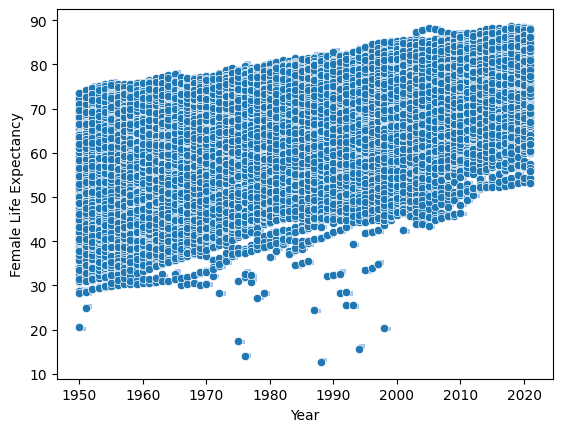

In [62]:
# female life expectancy
sns.scatterplot(data=df, x="Year", y="Female Life Expectancy")

In [71]:
# sns.scatterplot(data=df, x="Year", y="Female Life Expectancy", hue="Country")

<Axes: title={'center': 'U.S. Female Life Expectancy Over Time'}, xlabel='Year', ylabel='Female Life Expectancy'>

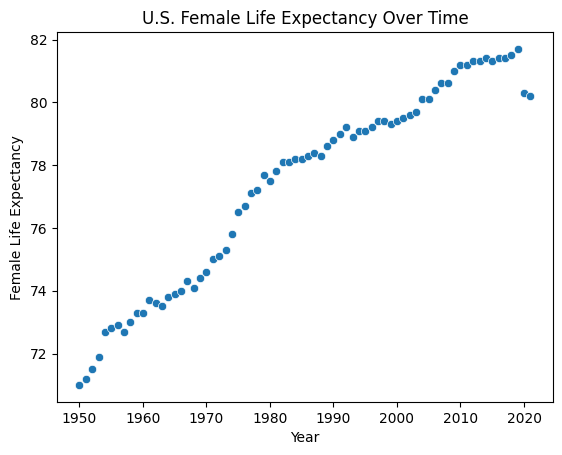

In [66]:
us_life_expectancy = df.query("Country == 'United States'")
plt.title("U.S. Female Life Expectancy Over Time")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Female Life Expectancy")

<Axes: title={'center': 'U.S. Male Life Expectancy Over Time'}, xlabel='Year', ylabel='Male Life Expectancy'>

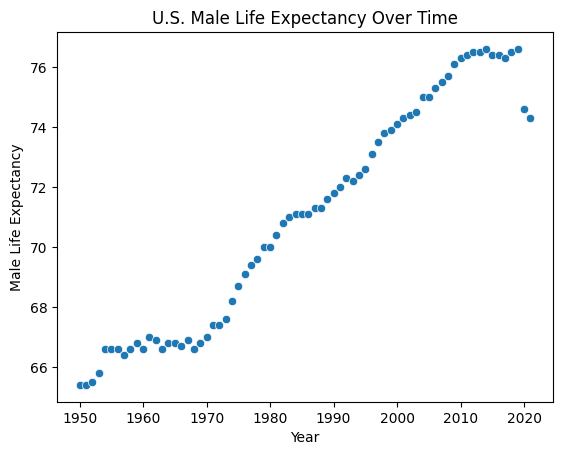

In [67]:
plt.title("U.S. Male Life Expectancy Over Time")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Male Life Expectancy")
# sns.scatterplot(data=us_life_expectancy, x="Year", y="Life Expectancy", hue="Gender")


<Axes: title={'center': 'U.S. Population Over Time'}, xlabel='Year', ylabel='Population'>

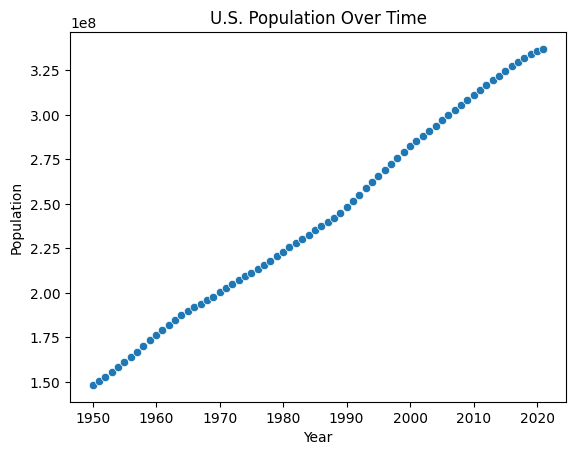

In [69]:
plt.title("U.S. Population Over Time")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Population")

<Axes: title={'center': 'U.S. Life Expectancy Gap Over Time'}, xlabel='Year', ylabel='Life Expectancy Gap'>

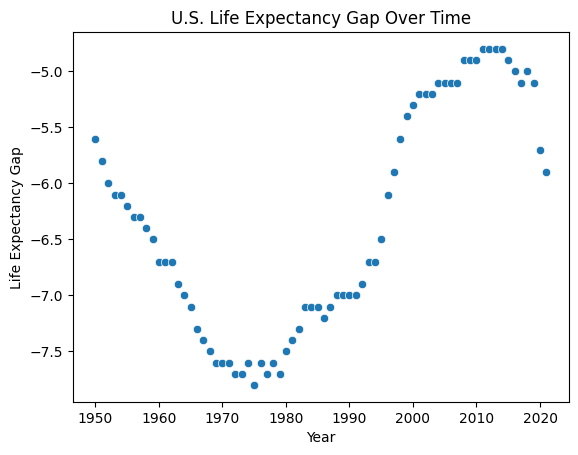

In [70]:
plt.title("U.S. Life Expectancy Gap Over Time")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Life Expectancy Gap")